In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
noise_scale = 100
number_of_samples = 50
x = 25*(np.random.rand(number_of_samples) - 0.8)
y = 5 * x + 20 * x**2 + 1 * x**3 + noise_scale*np.random.randn(number_of_samples)

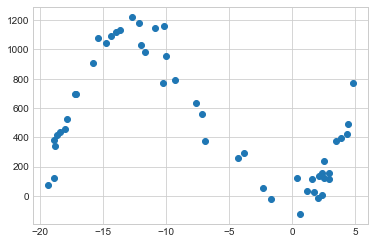

In [18]:
plt.plot(x,y,'o')

poly1d([  1.06556365,  21.54178324,  10.86975538, -39.42162186])

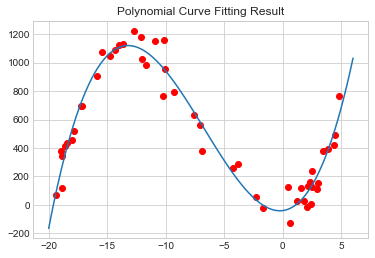

In [31]:
poly = np.poly1d(np.polyfit(x,y,3))
xn = np.linspace(-20, 6, 100)
yn = poly(xn)
plt.plot(x,y,'ro')
plt.plot(xn,yn)
plt.title("Polynomial Curve Fitting Result")
poly

In [4]:
mse = 0
for i, d in enumerate(x):
  mse = mse + (y[i] - poly(d))**2/number_of_samples
mse

7336.616799926504

# For Genetic Algorithm-->
We're going to assume that the number of genes is 4 (for a 3 degree polynomial). We'll create 100 arrays(Organisms) with random values of these genes and then compute the MSE for these polynomials. We will discard the lowest performing 90 gene-sets and generate new genes from the 10 best performing genes. We will repeat this process 500 times.

In [5]:
import random
genes = np.empty(shape=(100,4),dtype='object') 
for i in range(0,100):
  for j in range(0,4):
    genes[i][j]=random.uniform(-5,5)
  del j
del i
genes[99]

array([-2.1194426137959113, 3.3400371804739812, 4.927354018072423,
       -4.086981520907731], dtype=object)

In [6]:
y_new = np.empty(100, dtype=object)
MSE_GA = np.empty(100, dtype=object)
new_genes = np.empty(shape=(100,4),dtype='object') 

In [7]:
for l in range (1,500):
  for j in range(0,100):
    y_new[j]=np.poly1d(genes[j])
    mse=0
    for k, d in enumerate(x):
      mse=mse+(y[k]-y_new[j](d))**2/number_of_samples
      MSE_GA[j]=mse
  k=10
  idx = np.argpartition(MSE_GA, k)
  
  for i in range(0,k):
    new_genes[i*10]=genes[idx[i]]
    for j in range(1,10):
      new_genes[i*10+j]=genes[idx[i]]
      r=random.randint(0,3)
      new_genes[i*10+j][r]=new_genes[i*10+j][r]*random.uniform(0,2)
  genes=new_genes


In [8]:
for j in range(0,100):
  y_new[j]=np.poly1d(genes[j])
  mse=0
  for k, d in enumerate(x):
    mse=mse+(y[k]-y_new[j](d))**2/number_of_samples
    MSE_GA[j]=mse
k=10
idx = np.argpartition(MSE_GA, k)
y_new[idx[0]]
MSE_GA[idx[0]]

9437.246882944148

In [9]:
y_new[idx[0]]


poly1d([0.9027096300606022, 17.817296383465028, 1.0503289757969328e-46,
       31.226091107819446], dtype=object)

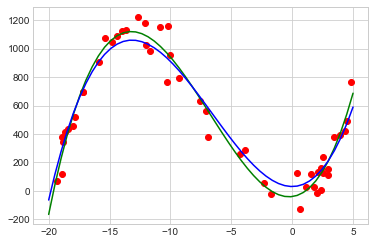

In [10]:
xn = np.linspace(-20, 6, 100)
yn = poly(xn)
yn2=y_new[idx[0]](xn)
plt.plot(x,y,'ro')
plt.plot(xn,yn, 'g')
plt.plot(xn,yn2, 'b')

In [11]:
import numpy as geek 
  
# input array 
in_arr = geek.array([ 2, 0,  1, 5, 4, 9]) 
print ("Input array : \n", in_arr)  
  
out_arr = geek.argpartition(in_arr, 3) 
print ("Output partitioned array indices :\n ", out_arr) 

Input array : 
 [2 0 1 5 4 9]
Output partitioned array indices :
  [1 2 0 4 3 5]


In [12]:
idx

array([ 0,  2,  6,  8, 10, 57, 20, 53, 52, 50, 25, 58, 82, 83, 84, 80, 85,
       13, 12,  7, 14, 56, 37, 78, 38, 31, 15, 43, 71, 77, 72, 74, 76, 48,
       47, 41, 40, 70, 73, 49, 36, 28, 30, 33, 23, 51, 79, 67, 99, 39, 64,
       60, 62, 90, 93, 19, 96, 24, 45, 46, 65, 22, 29,  1, 86, 26, 63, 54,
       59, 98, 17, 34, 91, 35, 69, 94, 66, 92,  9, 88, 89, 27, 11, 18, 68,
        3,  4, 97, 16, 44, 81, 95, 87, 42,  5, 55, 21, 32, 61, 75],
      dtype=int64)